In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

In [ ]:
df = pd.read_csv(".csv")
df.head()

In [ ]:
#Drop useless and sensitive
df_cleaned = df.drop(["columnUseless1","columnUseless2"],axis=1)
df_cleaned.head()

In [ ]:
#If there are categorical variables like Countries etc.
df_v1 = pd.get_dummies(df_cleaned, drop_first=True)
df_v1.head()

In [ ]:
y = df_v1["target"]
X = df_v1.copy()
X = X.drop("target",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

In [2]:
%%Time
cv_params = {"max_depth":[2,3,4,5, None],
             "min_samples_leaf":[1,2,3],
             "min_samples_split":[2,3,4],
             "max_features":[2,3,4],
             "n_estimators":[75,100,125,150]
             }
rf = RandomForestClassifier(random_state=0)
scoring = {"accuracy","precision","recall","f1"} 
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5,refit="f1")

rf_cv.fit(X_train, y_train)

UsageError: Cell magic `%%Time` not found.


In [ ]:
#Saving the model since it might use a lot of time to train
import pickle
path = "../Proyectos DS/"
with open(path+"rf_cv_model_p.pickle", "wb") as to_write:
    pickle.dump(rf_cv, to_write)

In [ ]:
#to open a pickle...
with open(path+"rf_cv_model_p.pickle", "rb") as to_read:
    rf_cv = pickle.load(to_read)

In [4]:
rf_cv.best_params_

NameError: name 'rf_cv' is not defined

In [ ]:
#Function copied from my other file
#We can arrange the results in a dataframe, as a function for reusing later
results = pd.DataFrame(columns=["Model","F1","Recall","Precision","Accuracy"])
def make_results(model_name, model_object):
    #Note: Model_Name is just a string for the name.
    cv_results = pd.DataFrame(model_object.cv_results_)
    #Calling just the one with highest mean f1
    best_estimator_results = cv_results.iloc[cv_results["mean_test_f1"].idxmax(),:]
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    data = pd.DataFrame()
    data = data.append({"Model": model_name, "F1": f1, "Precision": precision, "Accuracy": accuracy}, ignore_index=True)
    return data
results = make_results("Random Forest CV Tree",rf_cv)

In [ ]:
#Validating the data
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=10)

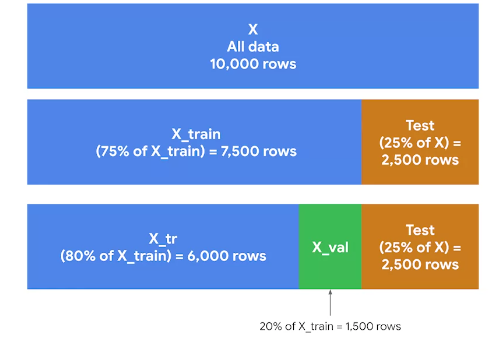

In [ ]:
#indexing for train and validation sets
split_index = [0 if x in X_val.index else -1 for x in X_train.index]

In [8]:
from sklearn.model_selection import PredefinedSplit

In [ ]:
cv_params = {"max_depth":[2,3,4,5, None],
             "min_samples_leaf":[1,2,3],
             "min_samples_split":[2,3,4],
             "max_features":[2,3,4],
             "n_estimators":[75,100,125,150]
             }
rf = RandomForestClassifier(random_state=0)
scoring = {"accuracy","precision","recall","f1"} 
custom_split = PredefinedSplit(split_index)
rf_val = GridSearchCV(rf, cv_params, scoring=scoring, cv=split_index,refit="f1")

In [ ]:
%%time 
rf_val.fit(X_train, y_train)

In [ ]:
rf_val.best_params_
rf_val_results = make_results("Random Forest Validated",rf_val)
results = pd.concat([rf_val_results, results])
results.sort_values(by=["F1"], ascending= False)